# Verificando libreria de reproduccion de audio

In [1]:
import librosa
audio_path = "sonido_guitarra.wav"
# Sr es sampling rate o frecuencia de muestreo
x,sr = librosa.load(audio_path)
print(type(x),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [2]:
print(x.shape, sr)

(397313,) 22050


# Graficando los datos de audio

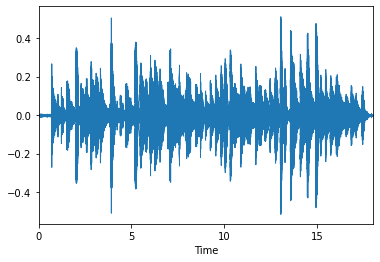

In [3]:
import matplotlib.pyplot as plt 
import librosa.display
plt.figure()
librosa.display.waveplot(x,sr=sr)

## Reproducción de audio

In [4]:
from IPython.display import Audio
from IPython.core.display import display
display(Audio('sonido_guitarra.wav',autoplay=True))

## Creamos ahora un audio.

In [6]:
import numpy as np

In [9]:
print(np.linspace(0,5,10,endpoint=True))

[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]


In [13]:
import soundfile as sf
sr = 22050 # sample rate o periodo de muestreo de la señal (el mismo que el del audio anterior)
T = 5.0    # tiempo de grabacion o duración
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
Audio(x, rate=sr) # load a NumPy array
#Saving the audio
sf.write('tone_220.wav', x, sr)

# Extrayendo caracteristicas

Existen muchas caracteristicas que podemos analizar en un audio, algunas de las más conocidas son: 


## Tasa de cruce por cero

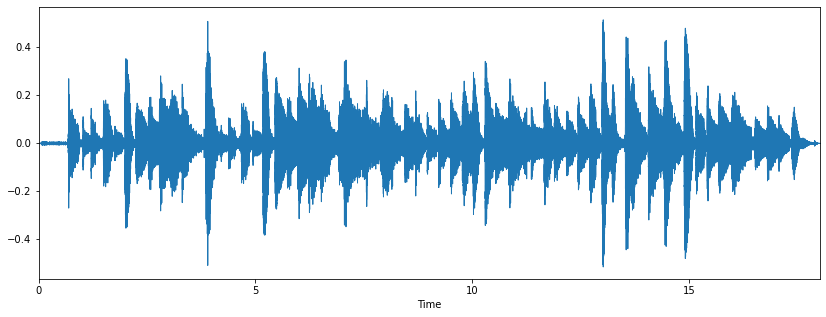

In [15]:
#Plot the signal:

x,sr = librosa.load(audio_path)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

Cruces por cero:  2


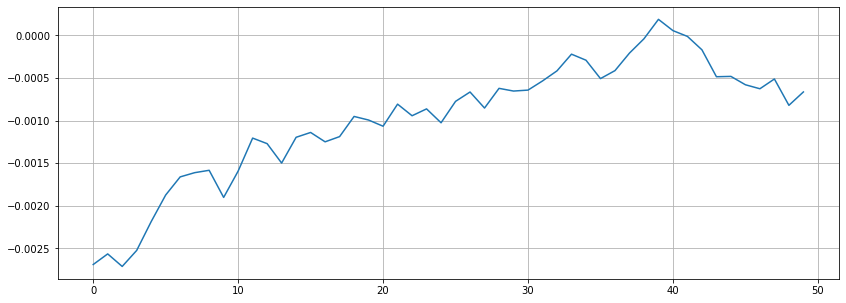

In [21]:
# Esto calcula la cantidad de cruces por cero que ha tenido la señal en un intervalo definido:
# Hagamos zoom en la parte del espectro correspondiente a los indices 9000 y 9100
n0 = 8700
n1 = 8750
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print("Cruces por cero: ", sum(zero_crossings))

plt.figure(figsize=(14, 5)) 
plt.plot(x[n0:n1]) 
plt.grid()

# Centroide espectral

Es una medida de donde se encuentra el centro de masa de la señal: se calcula como la media ponderada de las frecuencias presentes en el sonido.

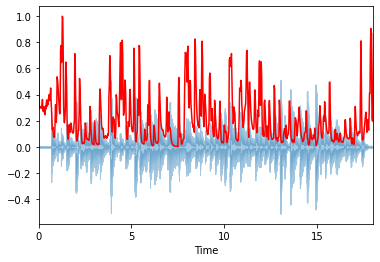

In [23]:
import sklearn.preprocessing

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')